In [1]:
from asammdf import MDF
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob

In [35]:
from pathlib import Path

path = r'C:\Users\YCAI40\OneDrive - Volvo Cars\case\energy_consumption\cycleData\\'

source_files = sorted(Path(path).glob('*.csv'))

dataframes = []
for file in source_files:
    df = pd.read_csv(file,index_col=[0]) # additional arguments up to your needs
    df['source'] = file.name
    dataframes.append(df)

df_all = pd.concat(dataframes,axis=0,ignore_index=True)
df_all.dtypes

cycle_id               int64
idling_percentage    float64
average_speed        float64
max_speed            float64
max_acc              float64
min_acc              float64
average_acc          float64
std_acc              float64
mileage              float64
time                  object
energy               float64
speed_label           object
source                object
dtype: object

In [36]:
df_all['time'] = pd.to_timedelta(df_all['time'])
df_all['time'] = [row['time'].total_seconds() for i,row in df_all.iterrows()]
df_all

,cycle_id,idling_percentage,average_speed,max_speed,max_acc,min_acc,average_acc,std_acc,mileage,time,energy,speed_label,source
0,0,100.000000,0.000310,0.251923,0.397674,-0.158248,-0.002796,0.036713,0.0,81.2,242.414653,low,20210829_1013-1148_Mid_T001.csv
1,1,98.431373,0.006872,0.717762,0.731836,-2.208876,-0.155108,0.132745,0.0,50.9,480.950711,low,20210829_1013-1148_Mid_T001.csv
2,2,92.244224,0.275163,5.011056,0.482078,-1.394078,-0.056716,0.125092,0.0,121.1,1649.187416,low,20210829_1013-1148_Mid_T001.csv
3,3,45.121951,2.575616,5.675710,0.611664,-1.223477,-0.056296,0.219311,0.0,40.9,614.657647,low,20210829_1013-1148_Mid_T001.csv
4,4,83.819483,0.859500,7.967016,0.606277,-1.324186,-0.066142,0.146056,0.0,181.6,3407.792251,low,20210829_1013-1148_Mid_T001.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,74,32.692308,1.034742,4.103073,0.739900,-0.530677,0.023260,0.250131,0.0,15.5,291.144089,low,20210904_1246-1553_T011.csv
643,75,21.794872,2.668504,6.385559,0.853714,-1.024215,-0.004976,0.586781,0.0,7.7,185.788071,low,20210904_1246-1553_T011.csv
644,76,17.111771,12.233532,35.396556,1.434427,-1.634707,-0.047268,0.531123,0.0,101.0,3201.787570,low,20210904_1246-1553_T011.csv
645,77,40.740741,1.759144,5.307411,0.562394,-0.389335,-0.056358,0.172388,0.0,26.9,450.501603,low,20210904_1246-1553_T011.csv


In [37]:
CLTC_cycle = pd.read_csv("CLTC_ Curve.csv",index_col=[0])
CLTC_cycle

,velocity,group_index
time,,
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
1796,0.0,11
1797,0.0,11
1798,0.0,11


In [38]:
CLTC_cycle['acceleration'] = CLTC_cycle['velocity'].diff()
CLTC_cycle['distance'] = CLTC_cycle['velocity']/3.6

CLTC_cycle.head(20)

,velocity,group_index,acceleration,distance
time,,,,
0,0.0,0,NaN,0.000000
1,0.0,0,0.0,0.000000
2,0.0,0,0.0,0.000000
3,0.0,0,0.0,0.000000
4,0.0,0,0.0,0.000000
5,0.0,0,0.0,0.000000
6,0.0,0,0.0,0.000000
7,0.0,0,0.0,0.000000
8,0.0,0,0.0,0.000000


In [39]:
CLTC_cycle = CLTC_cycle.reset_index()

In [40]:
CLTC_cycle

,time,velocity,group_index,acceleration,distance
0,0,0.0,0,NaN,0.0
1,1,0.0,0,0.0,0.0
2,2,0.0,0,0.0,0.0
3,3,0.0,0,0.0,0.0
4,4,0.0,0,0.0,0.0
...,...,...,...,...,...
1796,1796,0.0,11,0.0,0.0
1797,1797,0.0,11,0.0,0.0
1798,1798,0.0,11,0.0,0.0
1799,1799,0.0,11,0.0,0.0


In [41]:
#generate cycle information
grouped = CLTC_cycle.groupby('group_index')

idling_percentage = grouped.apply(lambda x: (x['velocity'] ==0).mean()*100)
speed_avg = grouped['velocity'].mean()
speed_max = grouped['velocity'].max()
acceleration_max = grouped['acceleration'].max()
acceleration_min = grouped['acceleration'].min()
acceleration_avg = grouped['acceleration'].mean()
acceleration_std = grouped['acceleration'].std()
mileage = grouped['distance'].sum()
time = grouped['time'].max() - grouped['time'].min()


df_cycle = pd.DataFrame({
    'cycle_id':idling_percentage.index,
    'idling_percentage':idling_percentage.values,
    'average_speed':speed_avg.values,
    'max_speed':speed_max.values,
    'max_acc':acceleration_max.values,
    'min_acc':acceleration_min.values,
    'average_acc':acceleration_avg.values,
    'std_acc':acceleration_std.values,
    'mileage':mileage.values,
    'time':time.values
})

In [9]:
df_cycle

,cycle_id,idling_percentage,average_speed,max_speed,max_acc,min_acc,average_acc,std_acc,mileage,time
0,0,100.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,14
1,1,31.034483,16.600000,33.6,3.4,-5.0,0.000000e+00,1.449860,401.166667,86
2,2,11.046512,14.776163,29.4,3.0,-3.6,0.000000e+00,1.025465,705.972222,171
3,3,70.588235,2.084314,11.4,2.3,-3.3,4.353816e-18,0.949105,29.527778,50
4,4,68.421053,2.863158,12.6,3.6,-4.6,0.000000e+00,1.030340,60.444444,75
5,5,72.268908,2.968908,17.6,2.4,-2.5,0.000000e+00,0.722636,98.138889,118
6,6,16.949153,26.069492,48.1,5.4,-6.0,0.000000e+00,2.363370,427.250000,58
7,7,15.094340,24.761321,45.2,4.3,-7.0,0.000000e+00,1.553491,729.083333,105
8,8,23.595506,24.406742,61.9,5.6,-4.8,0.000000e+00,2.079500,603.388889,88
9,9,20.218579,30.296721,62.0,6.4,-6.7,0.000000e+00,1.530604,1540.083333,182


In [42]:

from sklearn.decomposition import PCA

X_standard = df_cycle[['idling_percentage','average_speed','max_speed','max_acc','min_acc','average_acc','time']]
X_new = df_all[['idling_percentage','average_speed','max_speed','max_acc','min_acc','average_acc','time']]

pca = PCA(n_components=3)
X_standard_pca = pca.fit_transform(X_standard)
X_new_pca = pca.transform(X_new)

In [43]:
df_train_pca = pd.DataFrame(data=X_standard_pca,columns=['PC1','PC2','PC3'])
df_test_pca = pd.DataFrame(data=X_new_pca,columns=['PC1','PC2','PC3'])
df_train_pca['cluster']=df_train_pca.index


In [44]:
df_all['speed_label'].value_counts()

speed_label
low     574
mid      66
high      7
Name: count, dtype: int64

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_standard_pca,df_train_pca['cluster'])

pred = knn.predict(df_test_pca)

C:\Users\YCAI40\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [46]:
df_test_pca['cluster'] = pred
df_test_pca['cluster'].value_counts()

cluster
0     110
6     106
3      84
7      73
9      72
1      50
5      43
8      39
2      26
10     24
4      18
11      2
Name: count, dtype: int64

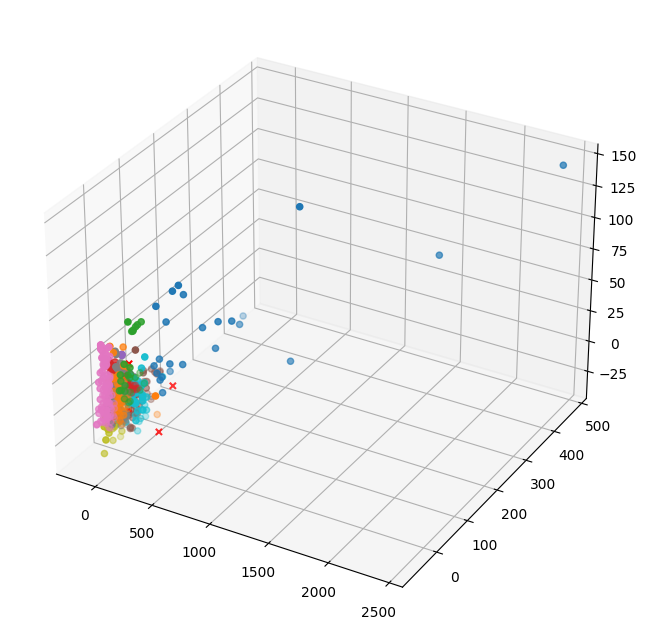

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_train_pca['PC1'],df_train_pca['PC2'],df_train_pca['PC3'],c='red',marker='x',label='Training Data')

for cluster_label in range(12):
    ax.scatter( df_test_pca[df_test_pca['cluster'] == cluster_label]['PC1'],
                df_test_pca[df_test_pca['cluster'] == cluster_label]['PC2'],
                df_test_pca[df_test_pca['cluster'] == cluster_label]['PC3'],
                label=f"Cluster {cluster_label}")

In [48]:
import plotly.express as px
  
df_train_pca['data']='train'
df_test_pca['data'] = 'test'

df_pca = pd.concat([df_train_pca,df_test_pca])

fig = px.scatter_3d(df_pca,x='PC1',y='PC2',z='PC3',color='cluster',symbol='data',
                    symbol_map={'train':'x','test':'circle'})
fig.update_layout(title='3D Scatter plot of driving cycle',
                  scene=dict(xaxis_title='Feature 1',yaxis_title='Feature 2', zaxis_title='Feature 3'))

fig.show()

In [49]:
df_pca['data'].value_counts()

data
test     647
train     12
Name: count, dtype: int64

In [50]:
df_all['speed_label'].value_counts()

speed_label
low     574
mid      66
high      7
Name: count, dtype: int64

In [51]:
distances, indices = knn.kneighbors(X_new_pca)
df_test_pca['distance'] =distances

In [52]:
group_sorted = df_test_pca.sort_values(by = ['cluster','distance'])
first_smallest_indexes = group_sorted.groupby('cluster').nth(0).index
second_smallest_indexes = group_sorted.groupby('cluster').nth(1).index
third_smallest_indexes = group_sorted.groupby('cluster').nth(2).index


df_closest_group = df_all.loc[first_smallest_indexes].reset_index()
second_closest_group = df_all.loc[second_smallest_indexes].reset_index()
third_closest_group = df_all.loc[third_smallest_indexes].reset_index()

In [21]:
group_sorted

,PC1,PC2,PC3,cluster,data,distance
572,-148.894820,36.418382,-7.538541,0,test,9.441679
78,-139.476869,46.060596,-11.905032,0,test,9.709046
491,-139.325700,45.288771,-11.515267,0,test,9.785470
314,-139.339314,46.433746,-12.143627,0,test,9.899815
373,-139.301582,46.317566,-12.261081,0,test,9.900720
...,...,...,...,...,...,...
621,1011.986649,146.867939,24.795401,10,test,743.807433
615,1789.918280,328.390408,90.239041,10,test,1543.504253
451,2420.106608,477.630122,144.315643,10,test,2192.801258
329,231.093730,-2.317895,7.538811,11,test,55.810987


In [54]:
second_closest_group

,index,cycle_id,idling_percentage,average_speed,max_speed,max_acc,min_acc,average_acc,std_acc,mileage,time,energy,speed_label,source
0,491,19,98.739496,0.001971,0.174797,0.263695,-0.477360,-0.067161,0.058018,0.0,23.7,273.588832,low,20210904_0916-1143_T010.csv
1,268,12,29.290618,18.230825,39.257964,1.527592,-1.424808,-0.048297,0.497690,0.0,87.3,3323.710957,low,20210830_1502-1547_Low_T007.csv
2,64,64,1.168512,15.478165,33.418439,1.789898,-2.066068,-0.060239,0.581737,0.0,162.5,7101.967948,low,20210829_1013-1148_Mid_T001.csv
3,296,13,62.708333,2.359698,11.719658,0.560999,-0.679416,-0.006356,0.236096,0.0,47.9,1170.808485,low,20210831_1223-1314_Mid_T006.csv
4,504,32,65.491924,2.137204,15.149727,1.425105,-1.126234,-0.063732,0.321353,0.0,68.0,1149.478235,low,20210904_0916-1143_T010.csv
5,484,12,65.732087,4.934619,29.212198,0.815603,-3.277851,-0.169285,0.431386,0.0,128.3,2834.464030,low,20210904_0916-1143_T010.csv
6,111,32,23.201439,22.636717,45.381024,2.057764,-2.636097,-0.053678,0.833599,0.0,55.5,3433.570352,low,20210829_1233-1530_Mid_T002.csv
7,378,5,18.775510,29.224215,46.164812,2.158222,-1.507465,-0.012342,0.585175,1.0,97.9,7207.512479,low,20210831_1439-1626_Mid_T009.csv
8,89,10,29.426129,31.475111,57.655600,2.280391,-2.384568,-0.153381,0.917042,0.0,81.8,5298.757054,low,20210829_1233-1530_Mid_T002.csv
9,392,19,17.715494,35.307371,56.668610,1.726790,-2.836575,-0.082820,0.481228,1.0,189.0,16746.483401,low,20210831_1439-1626_Mid_T009.csv


### print 11 similar cycle with Time

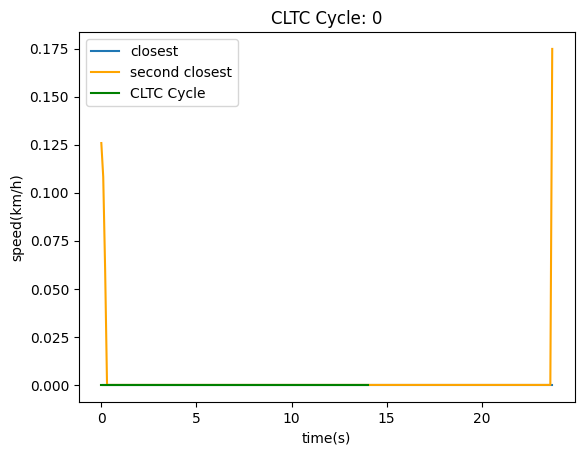

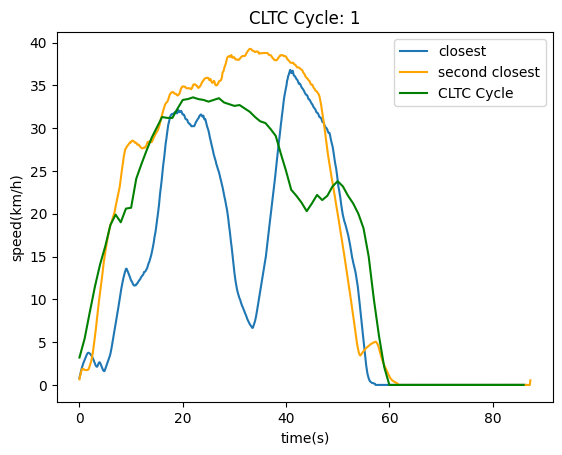

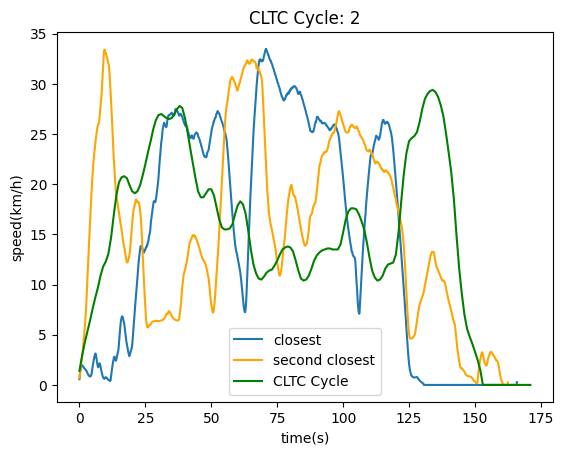

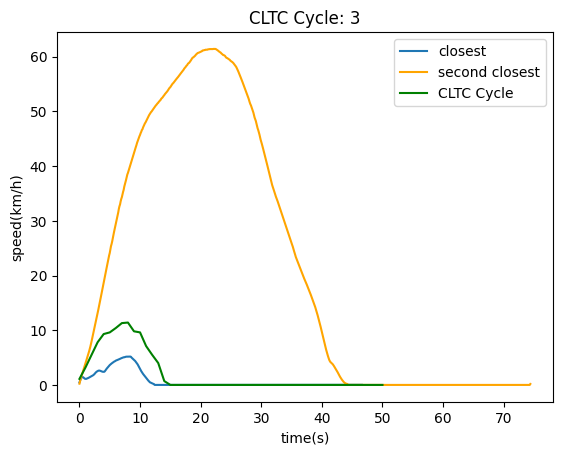

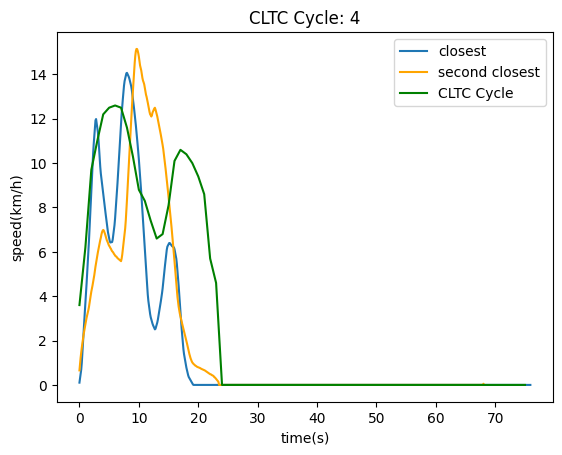

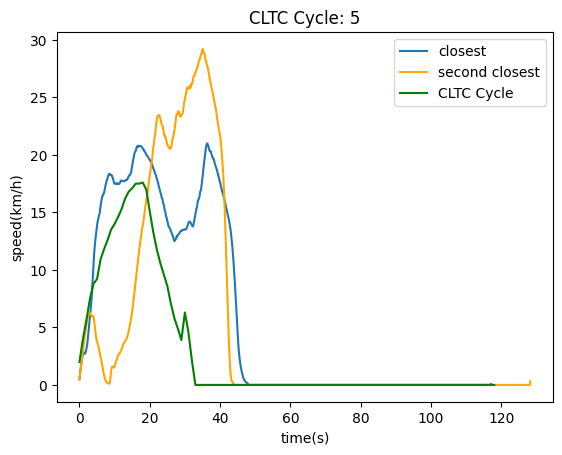

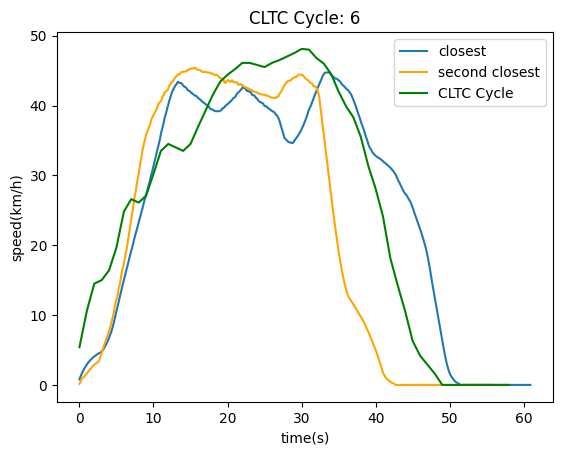

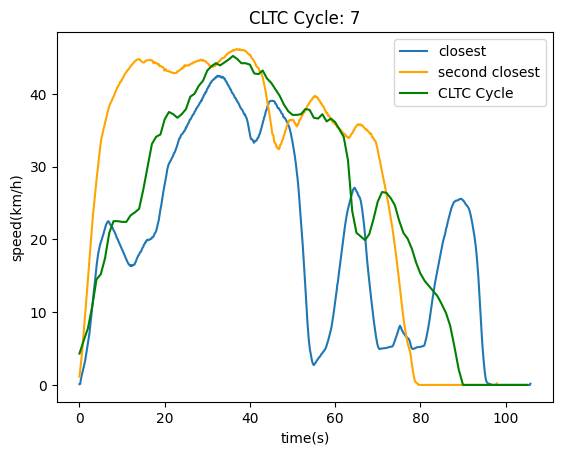

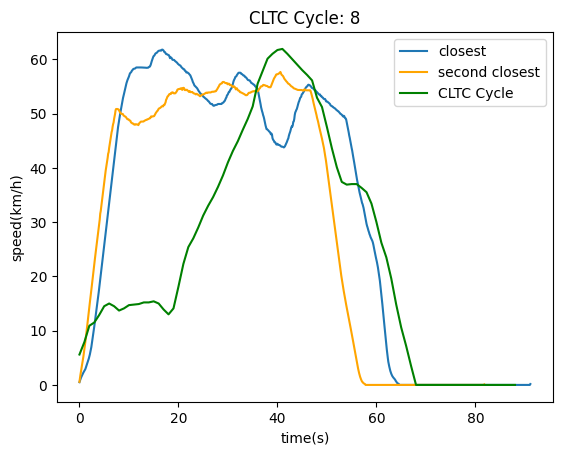

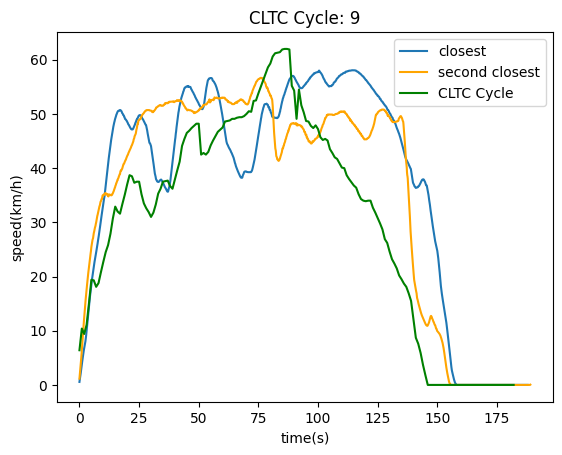

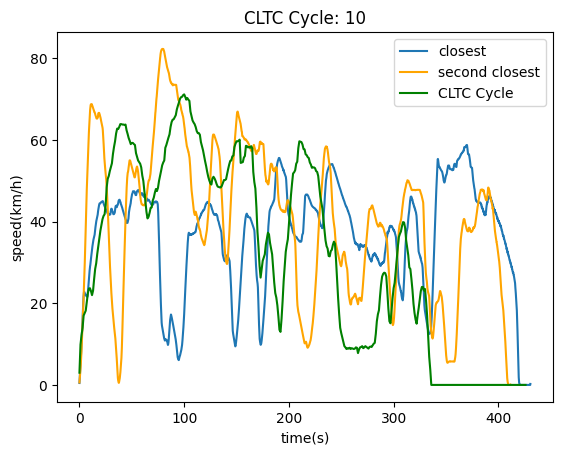

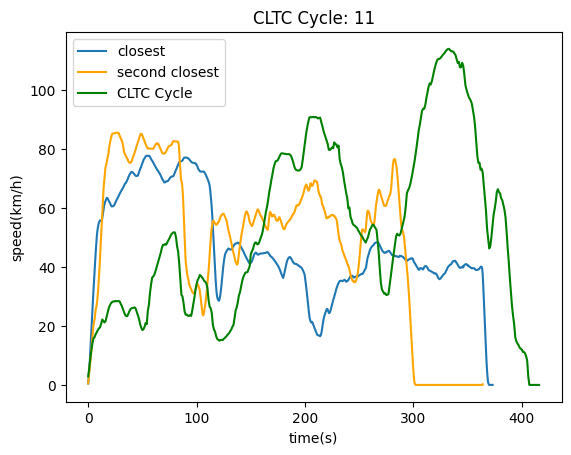

In [56]:
for index,row in df_closest_group.iterrows():
    record_second = second_closest_group.iloc[index]
    #record_third = third_closest_group.iloc[index]
    filename = row['source']
    filename_2 = record_second['source']
    #filename_3 = record_third['source']
    group_index = row['cycle_id']
    group_index_2 = record_second['cycle_id']
    #group_index_3 = record_third['cycle_id']
    group = pd.read_csv(r'processedCSV/'+filename,parse_dates=[1],index_col=0)
    group_2 = pd.read_csv(r'processedCSV/'+filename_2,parse_dates=[1],index_col=0)
    #group_3 = pd.read_csv(r'processedCSV/'+filename_3,parse_dates=[1],index_col=0)

    cycle_real = group[group['cycle_id'] == group_index].reset_index()
    cycle_real_2 = group_2[group_2['cycle_id'] == group_index_2].reset_index()
    #cycle_real_3 = group_3[group_3['cycle_id'] == group_index_3].reset_index()

    cycle_lab = CLTC_cycle[CLTC_cycle['group_index'] == index].reset_index()
    plt.plot(cycle_real.index/10,cycle_real['speed(km/h)'],label='closest')
    plt.plot(cycle_real_2.index/10,cycle_real_2['speed(km/h)'],color = 'orange',label='second closest')
    #plt.plot(cycle_real_3.index/10,cycle_real_3['speed(km/h)'],color = 'purple',label='third closest')

    plt.plot(cycle_lab['velocity'], color='green',label='CLTC Cycle')
    plt.title('CLTC Cycle: '+str(index))
    plt.xlabel('time(s)')
    plt.ylabel('speed(km/h)')
    plt.legend()    
    plt.show()


### Print 11 similar cycle without Time

In [24]:
from sklearn.decomposition import PCA

X_standard_clean = df_cycle[['idling_percentage','average_speed','max_speed','max_acc','min_acc','average_acc']]
X_new_clean = df_all[['idling_percentage','average_speed','max_speed','max_acc','min_acc','average_acc']]

pca_2 = PCA(n_components=3)
X_standard_pca_clean = pca_2.fit_transform(X_standard_clean)
X_new_pca_clean = pca_2.transform(X_new_clean)

In [25]:
df_train_pca_2 = pd.DataFrame(data=X_standard_pca_clean,columns=['PC1','PC2','PC3'])
df_test_pca_2 = pd.DataFrame(data=X_new_pca_clean,columns=['PC1','PC2','PC3'])
df_train_pca_2['cluster']=df_train_pca_2.index

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_standard_pca_clean,df_train_pca_2['cluster'])

pred = knn.predict(df_test_pca_2)
df_test_pca_2['cluster'] = pred
df_test_pca_2['cluster'].value_counts()

C:\Users\YCAI40\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



cluster
4     131
2      98
1      96
9      71
6      47
7      42
0      41
8      38
5      30
3      29
10     22
11      3
Name: count, dtype: int64

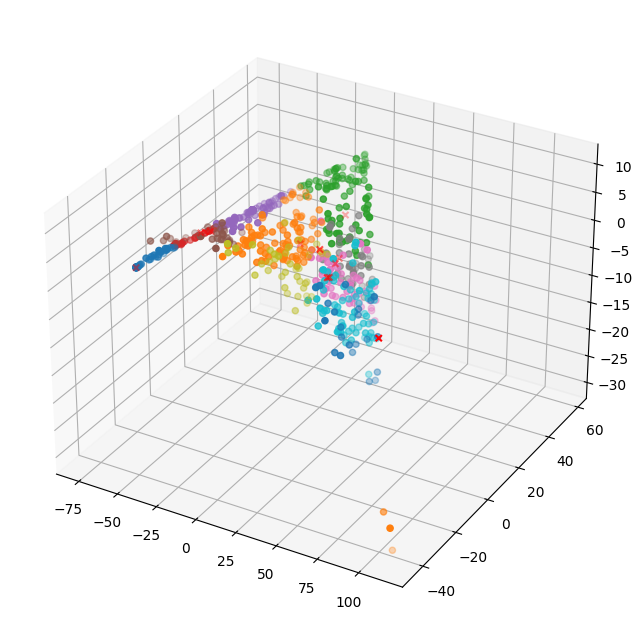

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_train_pca_2['PC1'],df_train_pca_2['PC2'],df_train_pca_2['PC3'],c='red',marker='x',label='Training Data')

for cluster_label in range(12):
    ax.scatter( df_test_pca_2[df_test_pca_2['cluster'] == cluster_label]['PC1'],
                df_test_pca_2[df_test_pca_2['cluster'] == cluster_label]['PC2'],
                df_test_pca_2[df_test_pca_2['cluster'] == cluster_label]['PC3'],
                label=f"Cluster {cluster_label}")

In [28]:
import plotly.express as px
  
df_train_pca_2['data']='train'
df_test_pca_2['data'] = 'test'

df_pca_2 = pd.concat([df_train_pca_2,df_test_pca_2])

fig = px.scatter_3d(df_pca_2,x='PC1',y='PC2',z='PC3',color='cluster',symbol='data',
                    symbol_map={'train':'x','test':'circle'})
fig.update_layout(title='3D Scatter plot of driving cycle',
                  scene=dict(xaxis_title='Feature 1',yaxis_title='Feature 2', zaxis_title='Feature 3'))

fig.show()

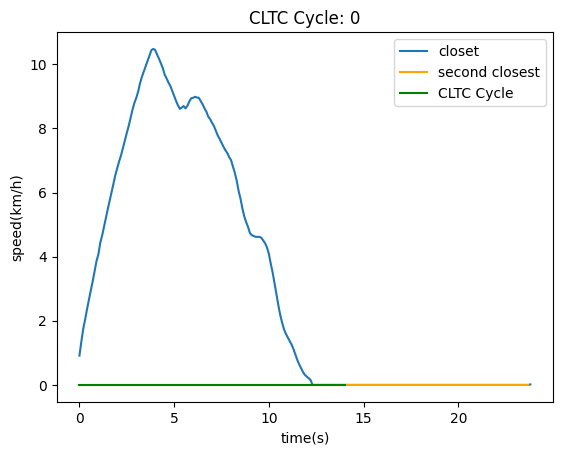

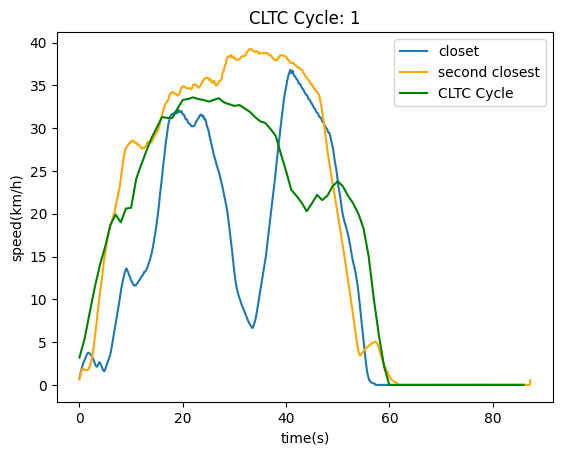

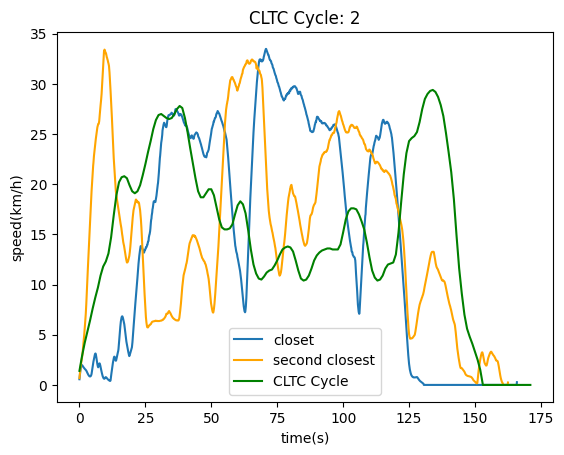

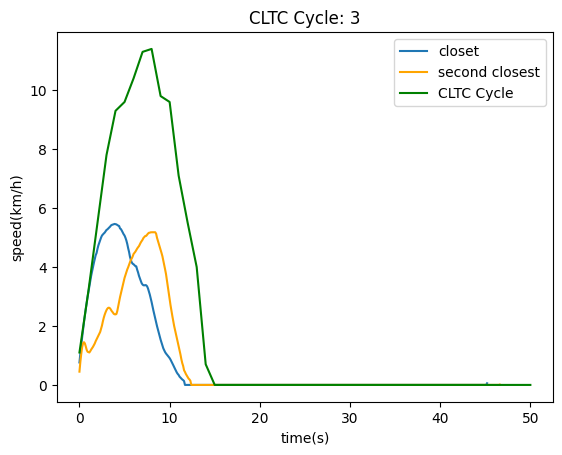

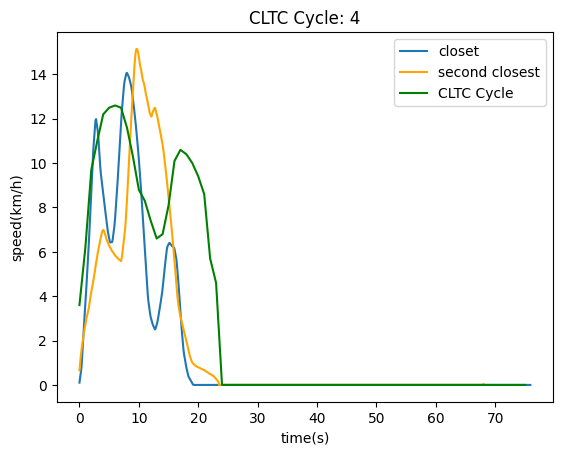

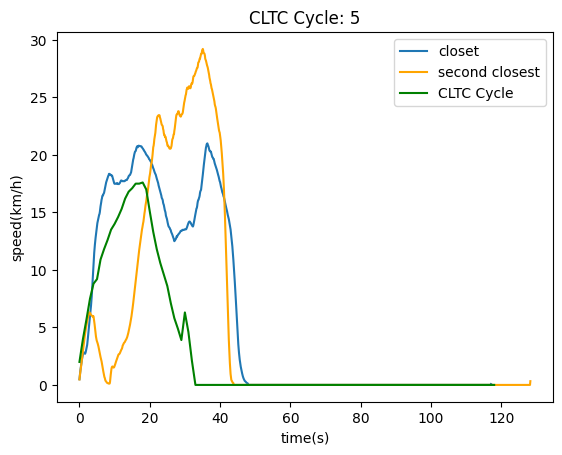

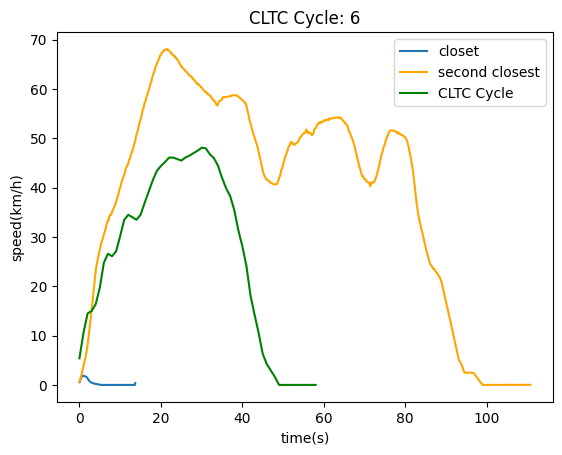

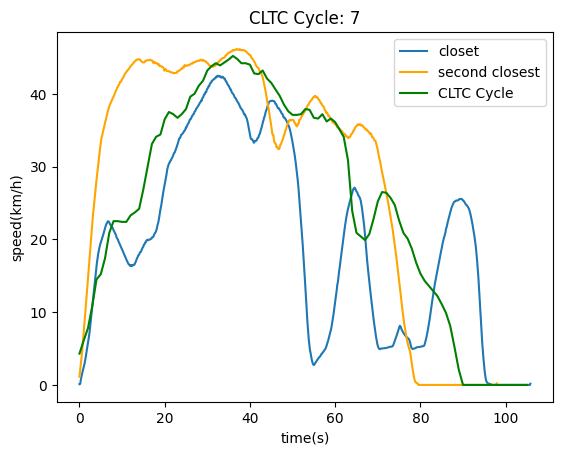

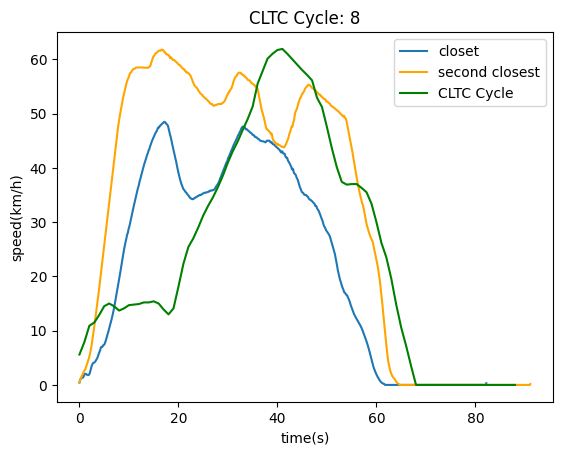

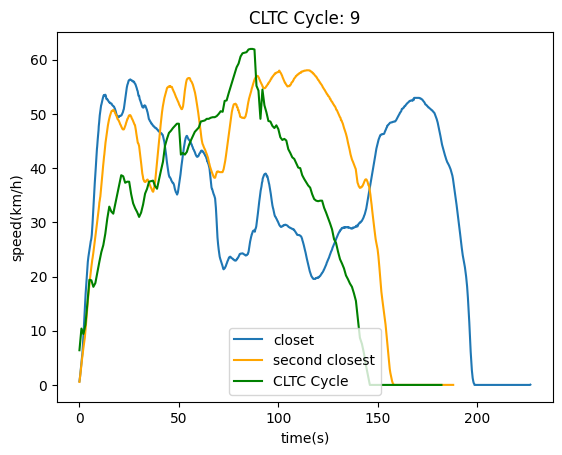

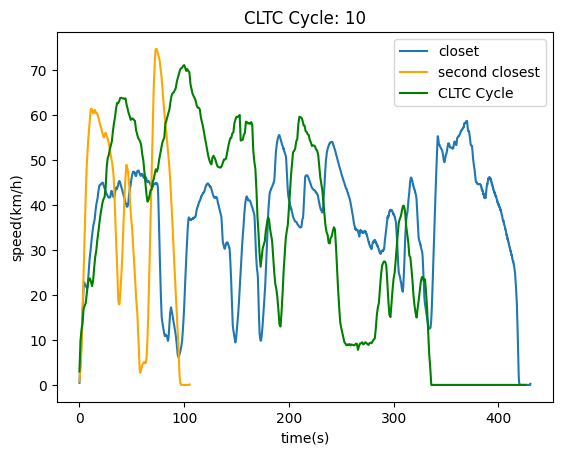

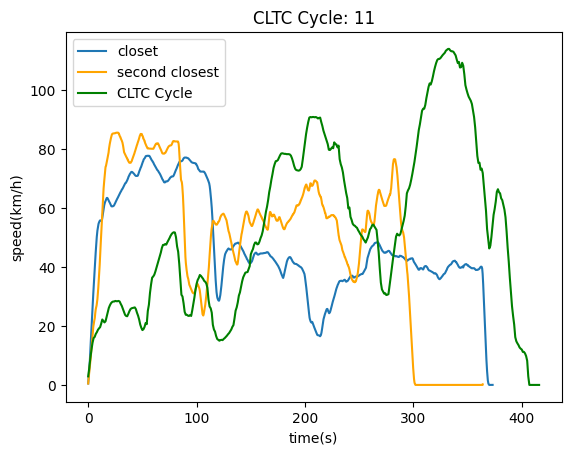

In [29]:
for index,row in df_closest_group.iterrows():
    record_second = second_closest_group.iloc[index]
    filename = row['source']
    filename_2 = record_second['source']
    group_index = row['cycle_id']
    group_index_2 = record_second['cycle_id']
    group = pd.read_csv(r'processedCSV/'+filename,parse_dates=[1],index_col=0)
    group_2 = pd.read_csv(r'processedCSV/'+filename_2,parse_dates=[1],index_col=0)
    cycle_real = group[group['cycle_id'] == group_index].reset_index()
    cycle_real_2 = group_2[group_2['cycle_id'] == group_index_2].reset_index()

    cycle_lab = CLTC_cycle[CLTC_cycle['group_index'] == index].reset_index()
    plt.plot(cycle_real.index/10,cycle_real['speed(km/h)'],label='closet')
    plt.plot(cycle_real_2.index/10,cycle_real_2['speed(km/h)'],color = 'orange',label='second closest')

    plt.plot(cycle_lab['velocity'], color='green',label='CLTC Cycle')
    plt.title('CLTC Cycle: '+str(index))
    plt.xlabel('time(s)')
    plt.ylabel('speed(km/h)')
    plt.legend()    
    plt.show()



In [30]:
pca.components_

array([[-1.33725327e-01,  8.87233233e-02,  1.89011177e-01,
         7.99638942e-03, -7.27526419e-03, -7.97036585e-22,
         9.68712347e-01],
       [ 7.77217724e-01, -2.87751972e-01, -5.05802467e-01,
        -3.33523334e-02,  4.38383872e-02,  8.37817134e-21,
         2.32940109e-01],
       [-6.08519372e-01, -2.82552059e-01, -7.36456636e-01,
         5.22462846e-03, -1.32254160e-02, -1.40923523e-20,
         8.54278824e-02]])

11

In [31]:
def speed_labels(speed):
    if (speed <60): return "low"
    if (speed >= 60) & (speed < 80): return "mid"
    else: return "high"



for index, item in df_all.iterrows():
    df_all.loc[index,'speed_label'] = speed_labels(df_all.loc[index,'max_speed'])
    print("\r",index,end = '')

 647

In [60]:
group_high = df_all[df_all['speed_label'] == 'high']

In [61]:
group_high

,cycle_id,idling_percentage,average_speed,max_speed,max_acc,min_acc,average_acc,std_acc,mileage,time,energy,speed_label,source
451,35,0.263620,93.576196,134.960688,1.953967,-3.154018,-0.064460,0.385468,67.0,2617.3,481897.405251,high,20210901_High_T005.csv
461,45,17.083219,47.928666,85.596156,2.102234,-3.166733,-0.101499,0.632025,4.0,364.0,30535.366327,high,20210901_High_T005.csv
615,47,0.128015,89.971197,134.130204,1.745184,-2.675618,-0.058901,0.385404,48.0,1952.8,370382.256618,high,20210904_1246-1553_T011.csv
621,53,1.380884,87.009152,129.625884,2.074499,-5.575882,-0.068505,0.580224,19.0,1149.5,143612.019449,high,20210904_1246-1553_T011.csv
633,65,22.869955,40.389859,83.990599,2.997308,-3.129080,-0.064959,1.155962,1.0,66.8,5835.670205,high,20210904_1246-1553_T011.csv
635,67,0.558252,40.917051,82.330524,2.774694,-2.750227,-0.064976,0.830370,5.0,411.9,27269.521730,high,20210904_1246-1553_T011.csv
640,72,3.225806,55.216036,80.007984,2.109704,-3.292428,-0.061170,0.951204,2.0,108.4,10294.232390,high,20210904_1246-1553_T011.csv


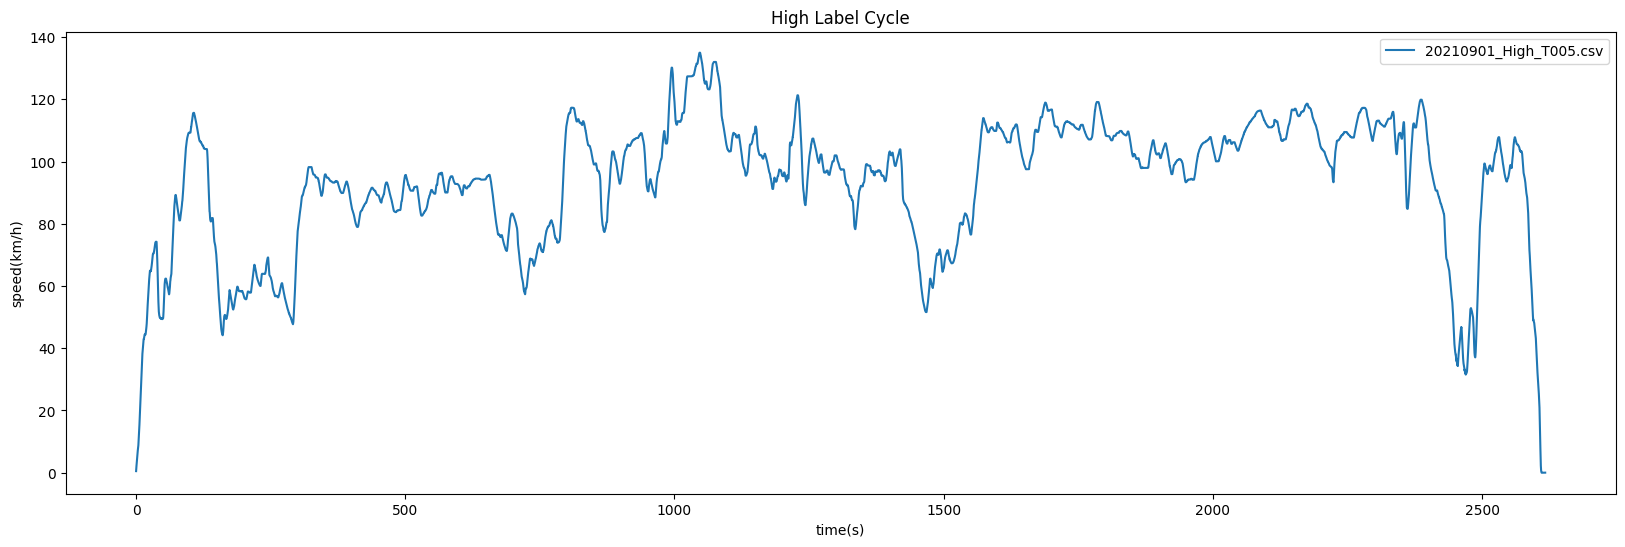

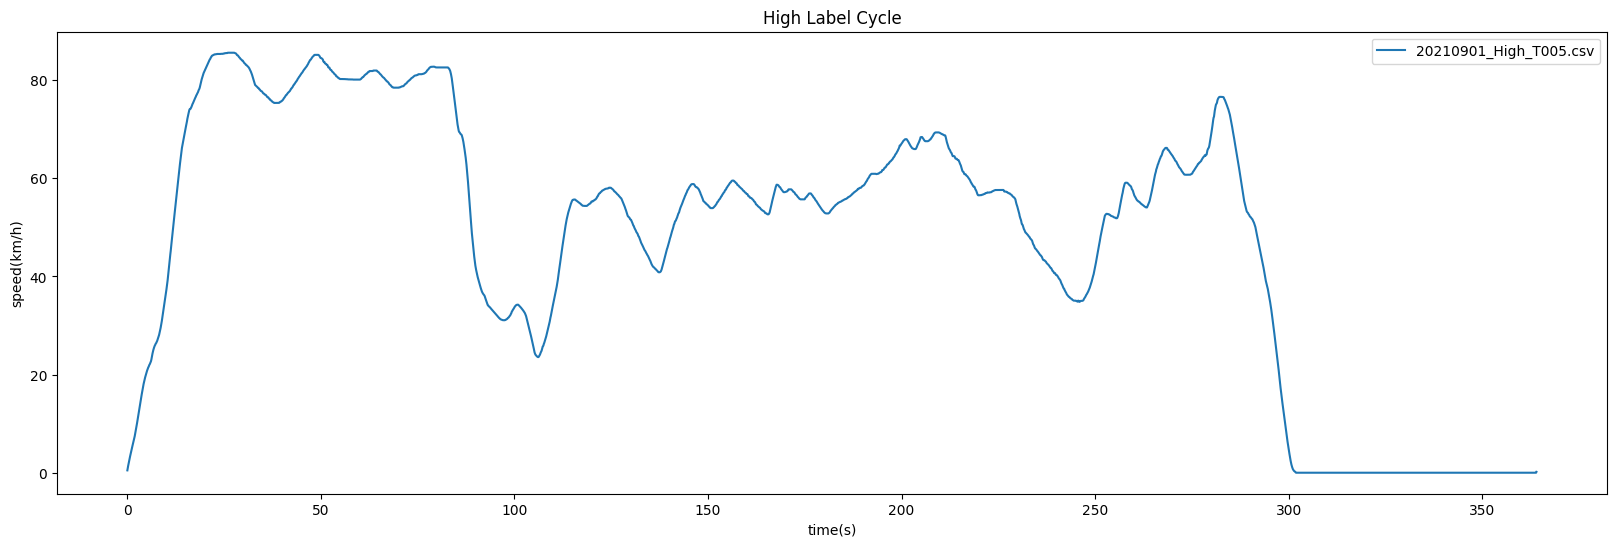

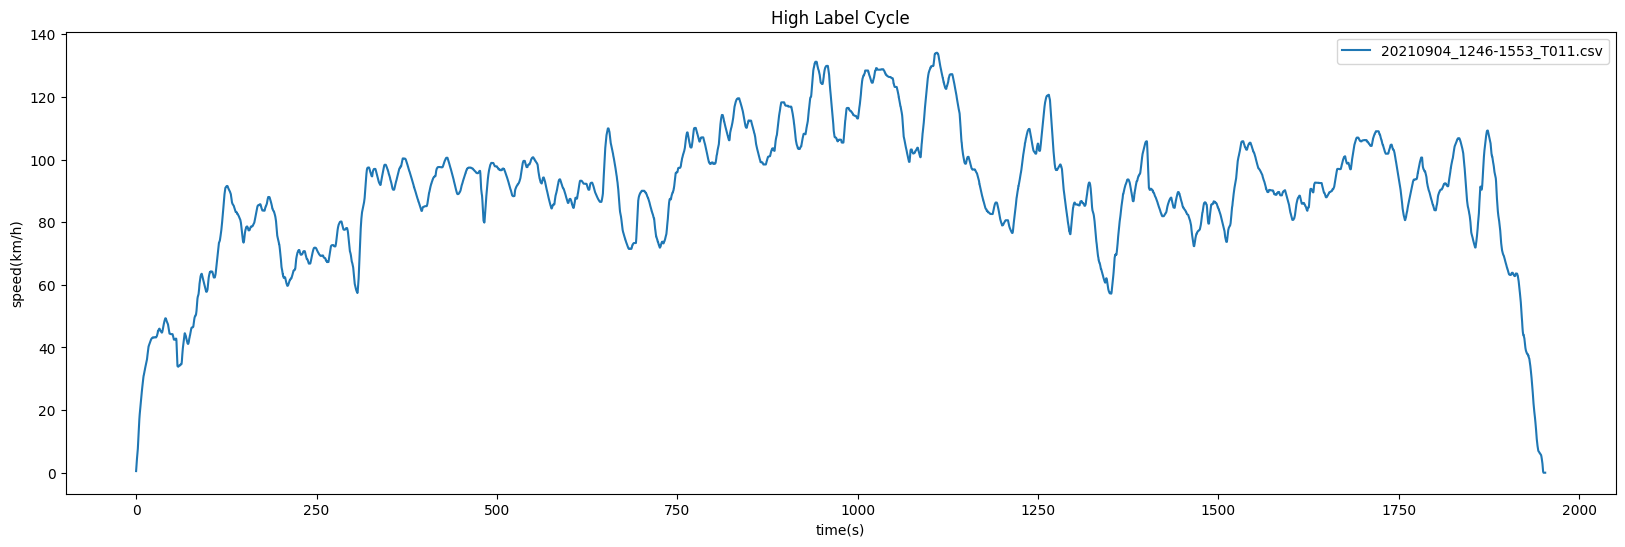

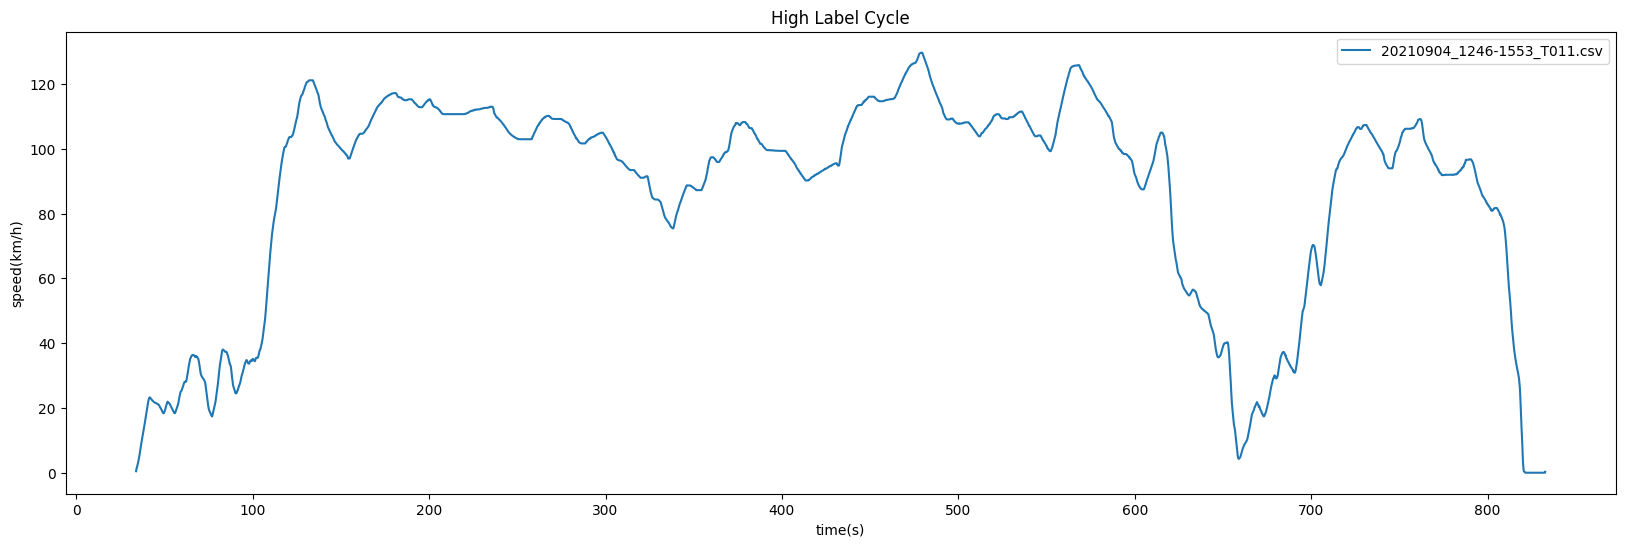

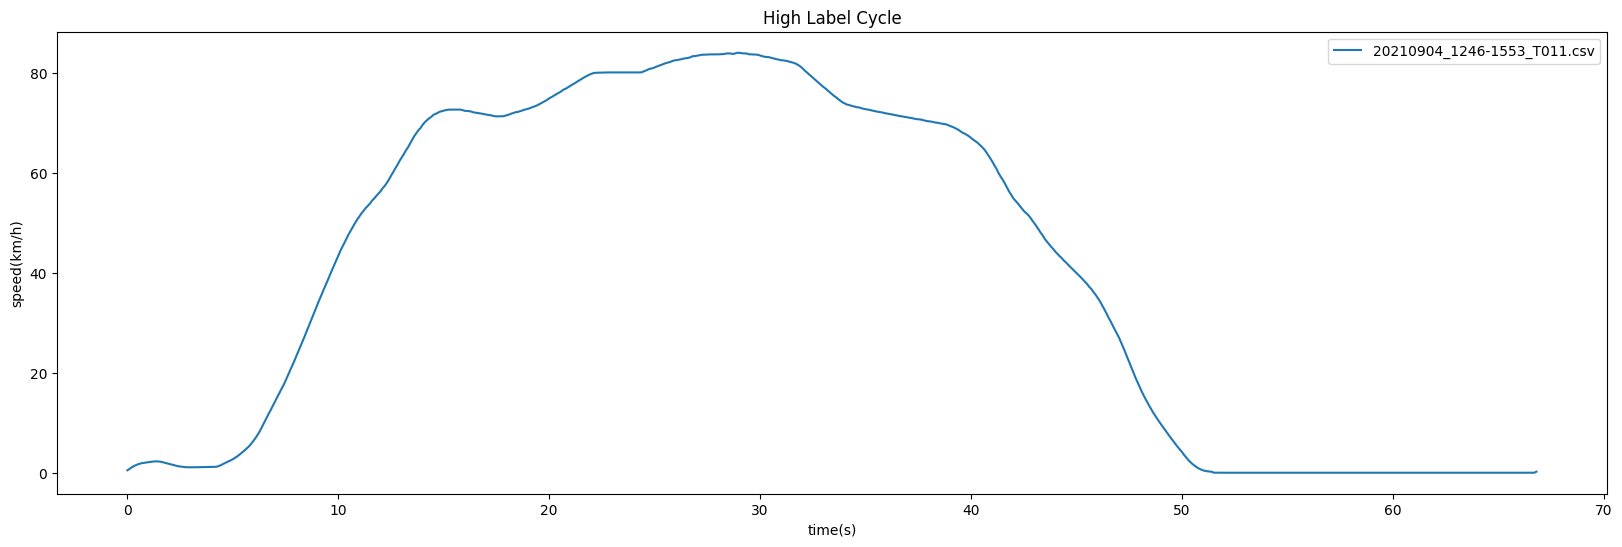

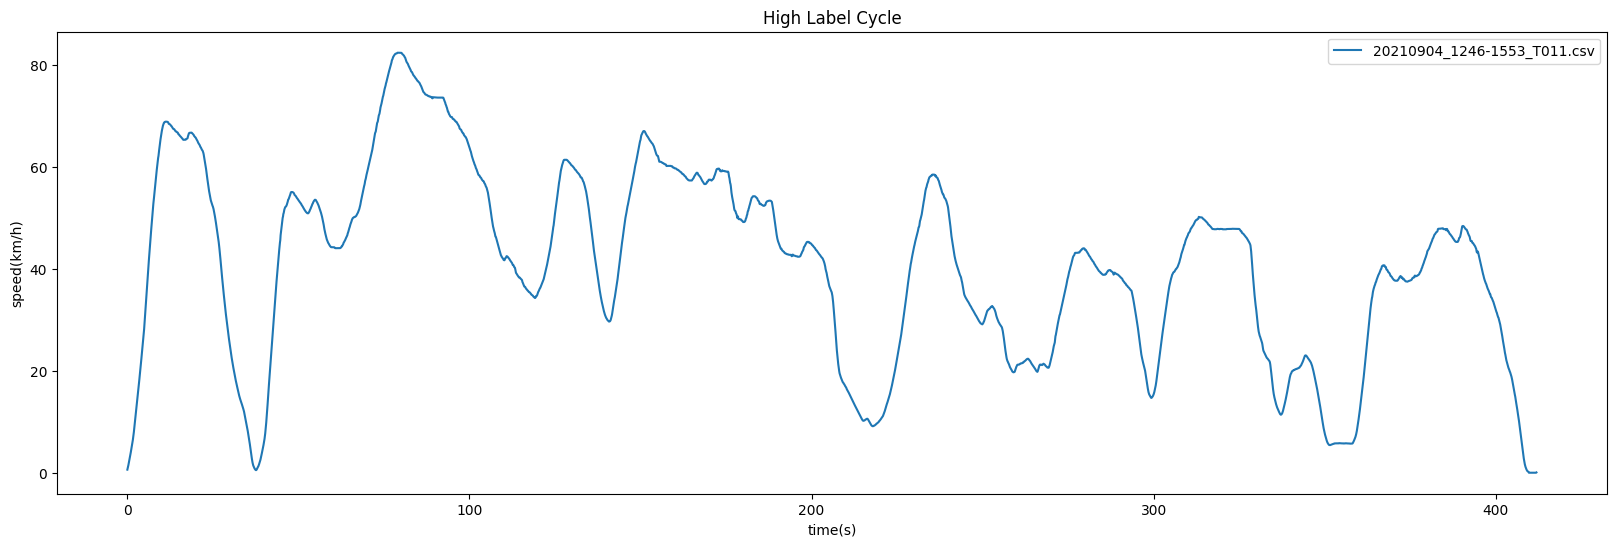

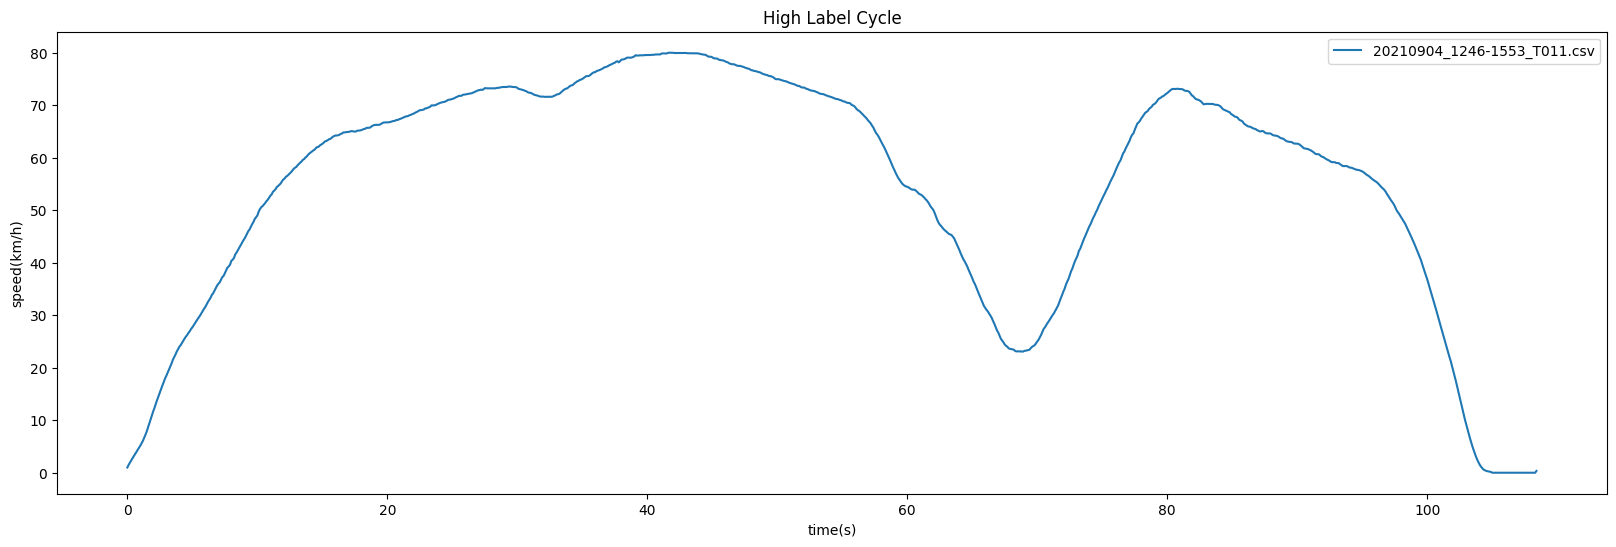

In [62]:
for index,row in group_high.iterrows():
    filename = row['source']
    group_index = row['cycle_id']
    group = pd.read_csv(r'processedCSV/'+filename,parse_dates=[1],index_col=0)
    cycle_real = group[group['cycle_id'] == group_index].reset_index()
    plt.figure(figsize=(20,6))
    plt.plot(cycle_real.index/10,cycle_real['speed(km/h)'],label=filename)
    plt.title('High Label Cycle')
    plt.xlabel('time(s)')
    plt.ylabel('speed(km/h)')
    plt.legend()    

#### mid

In [ ]:
df_test_low = df_all[df_all['speed_label']=='low']
df_test_mid = df_all[df_all['speed_label']=='mid']
df_test_high = df_all[df_all['speed_label']=='high']

In [ ]:
df_train_low = df_cycle[df_cycle['speed_label']=='low']
df_train_mid = df_cycle[df_cycle['speed_label']=='mid']
df_train_high = df_cycle[df_cycle['speed_label']=='high']

### Training Separatly with Low, Mid, High

#### Low


In [ ]:
df_train = df_train_low[['idling_percentage','average_speed','max_speed','max_acc','min_acc','average_acc','mileage']]
df_test = df_test_low[['idling_percentage','average_speed','max_speed','max_acc','min_acc','average_acc','mileage']]

pca = PCA(n_components=3)
X_standard_pca = pca.fit_transform(df_train)
X_new_pca = pca.transform(df_test)

df_train_pca = pd.DataFrame(data=X_standard_pca,columns=['PC1','PC2','PC3'])
df_test_pca = pd.DataFrame(data=X_new_pca,columns=['PC1','PC2','PC3'])
df_train_pca['cluster']=df_train_pca.index

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_standard_pca,df_train_pca['cluster'])

pred = knn.predict(df_test_pca)
distances, indices = knn.kneighbors(X_new_pca)
df_test_pca['cluster'] = pred


C:\Users\YCAI40\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [ ]:
df_test_pca['distance'] =distances
df_test_pca

,PC1,PC2,PC3,cluster,distance
0,-311.199274,-21.409299,-6.055978,0,0.245437
1,-311.003826,-19.780998,-5.369168,0,1.906983
2,-310.157716,-12.717811,-3.952334,0,9.154711
3,-305.171880,23.158901,25.446450,3,38.767915
4,-309.128068,-4.595238,-0.451528,0,17.978266
...,...,...,...,...,...
570,-305.203199,23.054959,25.098285,3,38.555085
571,-298.945294,75.978089,30.553875,3,78.791354
572,-305.935969,17.482650,21.755559,3,35.010934
573,-303.981424,31.304327,34.420510,3,47.566601


In [ ]:
df_test_pca['cluster'].unique()

array([0, 3, 7], dtype=int64)

In [ ]:
min_distance_record = df_test_pca.loc[df_test_pca.groupby('cluster')['distance'].idxmin()]
min_distance_record

,PC1,PC2,PC3,cluster,distance
156,-311.213069,-21.600006,-5.902095,0,6.235500e-13
452,-307.403977,8.478758,7.278968,3,2.956299e+01
74,731.364942,-141.265973,-33.115099,7,3.356695e+02


In [ ]:
closest_points_info = [X_new_pca[index[0]] for index in indices]
len(closest_points_info)

648

In [ ]:
df_test_pca['cluster'].value_counts()

cluster
3    501
0     65
7      9
Name: count, dtype: int64

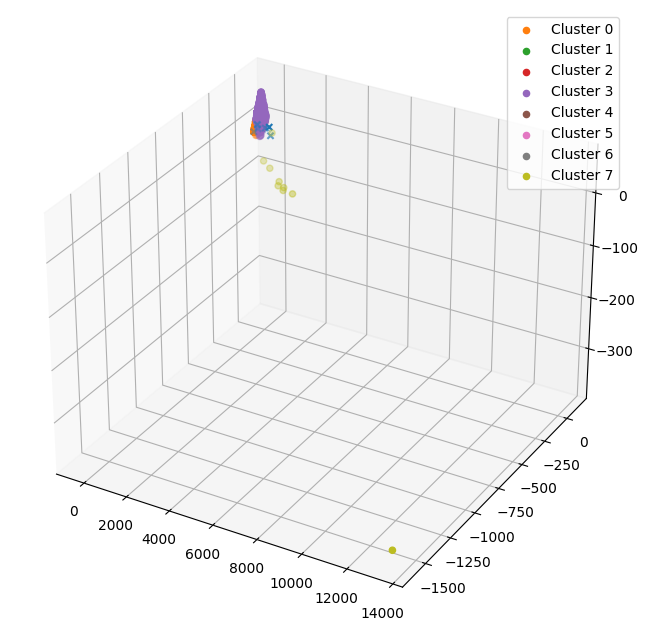

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_train_pca['PC1'],df_train_pca['PC2'],df_train_pca['PC3'],marker='x')

for cluster_label in range(8):
    ax.scatter( df_test_pca[df_test_pca['cluster'] == cluster_label]['PC1'],
                df_test_pca[df_test_pca['cluster'] == cluster_label]['PC2'],
                df_test_pca[df_test_pca['cluster'] == cluster_label]['PC3'],
                label=f"Cluster {cluster_label}")
ax.legend()

In [ ]:
df_train_pca['data']='train'
df_test_pca['data'] = 'test'

df_pca = pd.concat([df_train_pca,df_test_pca])
fig = px.scatter_3d(df_pca,x='PC1',y='PC2',z='PC3',color='cluster',symbol='data',
                    symbol_map={'train':'x','test':'circle'})
fig.update_layout(title='3D Scatter plot of driving cycle',
                  scene=dict(xaxis_title='Feature 1',yaxis_title='Feature 2', zaxis_title='Feature 3'))

fig.show()

In [ ]:
df_test_high

,cycle_id,idling_percentage,average_speed,max_speed,max_acc,min_acc,average_acc,std_acc,mileage,time,energy,speed_label,source
451,35,0.263620,93.576196,134.960688,1.953967,-3.154018,-0.064460,0.385468,67.0,0 days 00:43:37.300000,481897.405251,high,20210901_High_T005.csv
461,45,17.083219,47.928666,85.596156,2.102234,-3.166733,-0.101499,0.632025,4.0,0 days 00:06:04,30535.366327,high,20210901_High_T005.csv
615,46,0.869123,89.303562,134.130204,1.745184,-2.675618,-0.058588,0.384015,48.0,0 days 00:32:47.400000,370869.183605,high,20210904_1246-1553_T011.csv
621,52,3.285445,85.269361,129.625884,2.074499,-5.575882,-0.063750,0.573943,14253.0,0 days 00:19:25.900000,143395.318448,high,20210904_1246-1553_T011.csv
633,64,22.985075,40.329455,83.990599,2.997308,-3.129080,-0.063645,1.154828,1.0,0 days 00:01:06.900000,5837.521475,high,20210904_1246-1553_T011.csv
635,66,2.009089,40.320087,82.330524,2.774694,-2.750227,-0.064639,0.824319,5.0,0 days 00:06:58,27361.933546,high,20210904_1246-1553_T011.csv
640,71,19.230769,46.084157,80.007984,2.109704,-3.292428,-0.058984,0.869579,2.0,0 days 00:02:09.900000,10603.561044,high,20210904_1246-1553_T011.csv


In [ ]:
df_train_high

,cycle_id,idling_percentage,average_speed,max_speed,max_acc,min_acc,average_acc,std_acc,mileage,time,speed_label
11,11,2.398082,52.858034,114.0,4.5,-6.2,1.064962e-18,1.849636,6122.722222,416,high
